In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [24]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [25]:
df = df[['Day_Name', 'first']]

labelencoder = LabelEncoder()
df['Day_Name'] = labelencoder.fit_transform(df['Day_Name'])

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Day_Name']]).toarray())
ohe_df.columns = ohe.get_feature_names()
ohe_df = ohe_df.astype(int)

df = df.join(ohe_df)

output = len(df['first'].unique())

In [26]:
X = df.drop(['first', 'Day_Name'], axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [27]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))

optimizer = Adadelta(learning_rate=0.001, rho = 0.95, epsilon = 1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 4000, batch_size = 10, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/4000
185/185 [==============================] - 2s 6ms/step - loss: 3.2910 - accuracy: 0.0359 - val_loss: 3.2717 - val_accuracy: 0.0184
Epoch 2/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2882 - accuracy: 0.0288 - val_loss: 3.2708 - val_accuracy: 0.0184
Epoch 3/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2823 - accuracy: 0.0340 - val_loss: 3.2699 - val_accuracy: 0.0184
Epoch 4/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2916 - accuracy: 0.0291 - val_loss: 3.2690 - val_accuracy: 0.0184
Epoch 5/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.2864 - accuracy: 0.0386 - val_loss: 3.2681 - val_accuracy: 0.0184
Epoch 6/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2793 - accuracy: 0.0371 - val_loss: 3.2672 - val_accuracy: 0.0184
Epoch 7/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2810 - accuracy: 0.0332 - val_loss: 3.2663 - val_accuracy:

185/185 [==============================] - 0s 1ms/step - loss: 3.2454 - accuracy: 0.0598 - val_loss: 3.2200 - val_accuracy: 0.0890
Epoch 58/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2418 - accuracy: 0.0482 - val_loss: 3.2191 - val_accuracy: 0.0890
Epoch 59/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2357 - accuracy: 0.0667 - val_loss: 3.2182 - val_accuracy: 0.0890
Epoch 60/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2332 - accuracy: 0.0580 - val_loss: 3.2173 - val_accuracy: 0.0890
Epoch 61/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2392 - accuracy: 0.0549 - val_loss: 3.2164 - val_accuracy: 0.0890
Epoch 62/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2291 - accuracy: 0.0696 - val_loss: 3.2155 - val_accuracy: 0.0890
Epoch 63/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.2338 - accuracy: 0.0568 - val_loss: 3.2146 - val_accuracy: 0.0890

185/185 [==============================] - 0s 1ms/step - loss: 3.1976 - accuracy: 0.0727 - val_loss: 3.1723 - val_accuracy: 0.1043
Epoch 114/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1872 - accuracy: 0.0741 - val_loss: 3.1715 - val_accuracy: 0.1043
Epoch 115/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1872 - accuracy: 0.0751 - val_loss: 3.1707 - val_accuracy: 0.1043
Epoch 116/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1863 - accuracy: 0.0771 - val_loss: 3.1699 - val_accuracy: 0.1043
Epoch 117/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1962 - accuracy: 0.0685 - val_loss: 3.1691 - val_accuracy: 0.1043
Epoch 118/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1852 - accuracy: 0.0821 - val_loss: 3.1683 - val_accuracy: 0.1043
Epoch 119/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1836 - accuracy: 0.0793 - val_loss: 3.1675 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.1588 - accuracy: 0.0774 - val_loss: 3.1300 - val_accuracy: 0.1043
Epoch 170/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.1454 - accuracy: 0.0931 - val_loss: 3.1293 - val_accuracy: 0.1043
Epoch 171/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1468 - accuracy: 0.0775 - val_loss: 3.1286 - val_accuracy: 0.1043
Epoch 172/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1578 - accuracy: 0.0829 - val_loss: 3.1279 - val_accuracy: 0.1043
Epoch 173/4000
185/185 [==============================] - 0s 2ms/step - loss: 3.1513 - accuracy: 0.0883 - val_loss: 3.1272 - val_accuracy: 0.1043
Epoch 174/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1517 - accuracy: 0.0791 - val_loss: 3.1265 - val_accuracy: 0.1043
Epoch 175/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1349 - accuracy: 0.0955 - val_loss: 3.1258 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.1238 - accuracy: 0.0930 - val_loss: 3.0920 - val_accuracy: 0.1288
Epoch 226/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1239 - accuracy: 0.0838 - val_loss: 3.0913 - val_accuracy: 0.1288
Epoch 227/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1033 - accuracy: 0.0844 - val_loss: 3.0907 - val_accuracy: 0.1288
Epoch 228/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1209 - accuracy: 0.0822 - val_loss: 3.0900 - val_accuracy: 0.1288
Epoch 229/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1141 - accuracy: 0.0963 - val_loss: 3.0894 - val_accuracy: 0.1288
Epoch 230/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1069 - accuracy: 0.0999 - val_loss: 3.0887 - val_accuracy: 0.1288
Epoch 231/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.1171 - accuracy: 0.0914 - val_loss: 3.0881 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.0757 - accuracy: 0.0964 - val_loss: 3.0573 - val_accuracy: 0.1288
Epoch 282/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0905 - accuracy: 0.0939 - val_loss: 3.0568 - val_accuracy: 0.1288
Epoch 283/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0909 - accuracy: 0.0825 - val_loss: 3.0561 - val_accuracy: 0.1288
Epoch 284/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0791 - accuracy: 0.1086 - val_loss: 3.0556 - val_accuracy: 0.1288
Epoch 285/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0742 - accuracy: 0.1039 - val_loss: 3.0550 - val_accuracy: 0.1288
Epoch 286/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0869 - accuracy: 0.1079 - val_loss: 3.0544 - val_accuracy: 0.1288
Epoch 287/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0767 - accuracy: 0.1021 - val_loss: 3.0538 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.0617 - accuracy: 0.1073 - val_loss: 3.0255 - val_accuracy: 0.1166
Epoch 338/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0450 - accuracy: 0.0998 - val_loss: 3.0249 - val_accuracy: 0.1166
Epoch 339/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0538 - accuracy: 0.0989 - val_loss: 3.0244 - val_accuracy: 0.1166
Epoch 340/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0475 - accuracy: 0.1093 - val_loss: 3.0239 - val_accuracy: 0.1166
Epoch 341/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0455 - accuracy: 0.1217 - val_loss: 3.0233 - val_accuracy: 0.1166
Epoch 342/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0442 - accuracy: 0.1183 - val_loss: 3.0228 - val_accuracy: 0.1166
Epoch 343/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0587 - accuracy: 0.0982 - val_loss: 3.0222 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.0273 - accuracy: 0.0902 - val_loss: 2.9959 - val_accuracy: 0.1166
Epoch 394/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0285 - accuracy: 0.1022 - val_loss: 2.9953 - val_accuracy: 0.1166
Epoch 395/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0253 - accuracy: 0.1153 - val_loss: 2.9948 - val_accuracy: 0.1166
Epoch 396/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0313 - accuracy: 0.0979 - val_loss: 2.9943 - val_accuracy: 0.1166
Epoch 397/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0333 - accuracy: 0.1000 - val_loss: 2.9938 - val_accuracy: 0.1166
Epoch 398/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0131 - accuracy: 0.1206 - val_loss: 2.9933 - val_accuracy: 0.1166
Epoch 399/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0214 - accuracy: 0.1273 - val_loss: 2.9928 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 3.0044 - accuracy: 0.1207 - val_loss: 2.9682 - val_accuracy: 0.1166
Epoch 450/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9896 - accuracy: 0.1355 - val_loss: 2.9678 - val_accuracy: 0.1166
Epoch 451/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0085 - accuracy: 0.0891 - val_loss: 2.9673 - val_accuracy: 0.1166
Epoch 452/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0051 - accuracy: 0.1085 - val_loss: 2.9668 - val_accuracy: 0.1166
Epoch 453/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0062 - accuracy: 0.1102 - val_loss: 2.9663 - val_accuracy: 0.1166
Epoch 454/4000
185/185 [==============================] - 0s 1ms/step - loss: 3.0001 - accuracy: 0.1103 - val_loss: 2.9659 - val_accuracy: 0.1166
Epoch 455/4000
185/185 [==============================] - 0s 992us/step - loss: 2.9894 - accuracy: 0.1167 - val_loss: 2.9654 - val_accuracy

185/185 [==============================] - 0s 1ms/step - loss: 2.9782 - accuracy: 0.1269 - val_loss: 2.9425 - val_accuracy: 0.1166
Epoch 506/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9793 - accuracy: 0.1240 - val_loss: 2.9421 - val_accuracy: 0.1166
Epoch 507/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9728 - accuracy: 0.1217 - val_loss: 2.9416 - val_accuracy: 0.1166
Epoch 508/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9704 - accuracy: 0.1446 - val_loss: 2.9412 - val_accuracy: 0.1166
Epoch 509/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9757 - accuracy: 0.1116 - val_loss: 2.9407 - val_accuracy: 0.1166
Epoch 510/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9665 - accuracy: 0.1138 - val_loss: 2.9403 - val_accuracy: 0.1166
Epoch 511/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9718 - accuracy: 0.1097 - val_loss: 2.9398 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.9409 - accuracy: 0.1383 - val_loss: 2.9184 - val_accuracy: 0.1166
Epoch 562/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9638 - accuracy: 0.1122 - val_loss: 2.9180 - val_accuracy: 0.1166
Epoch 563/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9471 - accuracy: 0.1254 - val_loss: 2.9176 - val_accuracy: 0.1166
Epoch 564/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9488 - accuracy: 0.1199 - val_loss: 2.9172 - val_accuracy: 0.1166
Epoch 565/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9574 - accuracy: 0.1239 - val_loss: 2.9168 - val_accuracy: 0.1166
Epoch 566/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9493 - accuracy: 0.1121 - val_loss: 2.9164 - val_accuracy: 0.1166
Epoch 567/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9456 - accuracy: 0.1410 - val_loss: 2.9160 - val_accuracy: 

185/185 [==============================] - 0s 991us/step - loss: 2.9531 - accuracy: 0.1009 - val_loss: 2.8961 - val_accuracy: 0.1166
Epoch 618/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9554 - accuracy: 0.1062 - val_loss: 2.8957 - val_accuracy: 0.1166
Epoch 619/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9454 - accuracy: 0.1167 - val_loss: 2.8953 - val_accuracy: 0.1166
Epoch 620/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9346 - accuracy: 0.1199 - val_loss: 2.8950 - val_accuracy: 0.1166
Epoch 621/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9477 - accuracy: 0.1129 - val_loss: 2.8946 - val_accuracy: 0.1166
Epoch 622/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9319 - accuracy: 0.0943 - val_loss: 2.8942 - val_accuracy: 0.1166
Epoch 623/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9453 - accuracy: 0.1027 - val_loss: 2.8938 - val_accuracy

185/185 [==============================] - 0s 1ms/step - loss: 2.9160 - accuracy: 0.1304 - val_loss: 2.8755 - val_accuracy: 0.1166
Epoch 674/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9129 - accuracy: 0.1271 - val_loss: 2.8751 - val_accuracy: 0.1166
Epoch 675/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9084 - accuracy: 0.1104 - val_loss: 2.8748 - val_accuracy: 0.1166
Epoch 676/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9106 - accuracy: 0.1302 - val_loss: 2.8744 - val_accuracy: 0.1166
Epoch 677/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9175 - accuracy: 0.1218 - val_loss: 2.8741 - val_accuracy: 0.1166
Epoch 678/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.9204 - accuracy: 0.1216 - val_loss: 2.8737 - val_accuracy: 0.1166
Epoch 679/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8970 - accuracy: 0.1321 - val_loss: 2.8734 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8977 - accuracy: 0.1374 - val_loss: 2.8565 - val_accuracy: 0.1166
Epoch 730/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.9261 - accuracy: 0.0926 - val_loss: 2.8562 - val_accuracy: 0.1166
Epoch 731/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8637 - accuracy: 0.1385 - val_loss: 2.8559 - val_accuracy: 0.1166
Epoch 732/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8947 - accuracy: 0.1224 - val_loss: 2.8555 - val_accuracy: 0.1166
Epoch 733/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.9042 - accuracy: 0.1200 - val_loss: 2.8552 - val_accuracy: 0.1166
Epoch 734/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.9123 - accuracy: 0.1334 - val_loss: 2.8549 - val_accuracy: 0.1166
Epoch 735/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8959 - accuracy: 0.1022 - val_loss: 2.8545 - val_accuracy: 

185/185 [==============================] - 0s 2ms/step - loss: 2.8841 - accuracy: 0.1075 - val_loss: 2.8390 - val_accuracy: 0.1288
Epoch 786/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8770 - accuracy: 0.1171 - val_loss: 2.8387 - val_accuracy: 0.1288
Epoch 787/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8667 - accuracy: 0.1354 - val_loss: 2.8384 - val_accuracy: 0.1288
Epoch 788/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8936 - accuracy: 0.1156 - val_loss: 2.8381 - val_accuracy: 0.1288
Epoch 789/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8838 - accuracy: 0.1178 - val_loss: 2.8378 - val_accuracy: 0.1288
Epoch 790/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8796 - accuracy: 0.1281 - val_loss: 2.8375 - val_accuracy: 0.1288
Epoch 791/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8886 - accuracy: 0.1247 - val_loss: 2.8372 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8727 - accuracy: 0.1243 - val_loss: 2.8229 - val_accuracy: 0.1288
Epoch 842/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8652 - accuracy: 0.1258 - val_loss: 2.8226 - val_accuracy: 0.1288
Epoch 843/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8806 - accuracy: 0.1193 - val_loss: 2.8224 - val_accuracy: 0.1288
Epoch 844/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8643 - accuracy: 0.1188 - val_loss: 2.8221 - val_accuracy: 0.1288
Epoch 845/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8683 - accuracy: 0.1297 - val_loss: 2.8218 - val_accuracy: 0.1288
Epoch 846/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8695 - accuracy: 0.1240 - val_loss: 2.8216 - val_accuracy: 0.1288
Epoch 847/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8645 - accuracy: 0.1104 - val_loss: 2.8213 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8496 - accuracy: 0.1190 - val_loss: 2.8083 - val_accuracy: 0.1288
Epoch 898/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8375 - accuracy: 0.1245 - val_loss: 2.8080 - val_accuracy: 0.1288
Epoch 899/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8377 - accuracy: 0.1420 - val_loss: 2.8078 - val_accuracy: 0.1288
Epoch 900/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8621 - accuracy: 0.1314 - val_loss: 2.8076 - val_accuracy: 0.1288
Epoch 901/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8513 - accuracy: 0.1270 - val_loss: 2.8073 - val_accuracy: 0.1288
Epoch 902/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8535 - accuracy: 0.1280 - val_loss: 2.8071 - val_accuracy: 0.1288
Epoch 903/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8456 - accuracy: 0.1278 - val_loss: 2.8068 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8525 - accuracy: 0.1214 - val_loss: 2.7950 - val_accuracy: 0.1288
Epoch 954/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8643 - accuracy: 0.1243 - val_loss: 2.7947 - val_accuracy: 0.1288
Epoch 955/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8457 - accuracy: 0.1224 - val_loss: 2.7945 - val_accuracy: 0.1288
Epoch 956/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8416 - accuracy: 0.1440 - val_loss: 2.7943 - val_accuracy: 0.1288
Epoch 957/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8627 - accuracy: 0.1022 - val_loss: 2.7941 - val_accuracy: 0.1288
Epoch 958/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8531 - accuracy: 0.1166 - val_loss: 2.7938 - val_accuracy: 0.1288
Epoch 959/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8559 - accuracy: 0.1158 - val_loss: 2.7936 - val_accuracy: 

185/185 [==============================] - 0s 1ms/step - loss: 2.8362 - accuracy: 0.1236 - val_loss: 2.7830 - val_accuracy: 0.1288
Epoch 1010/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8131 - accuracy: 0.1390 - val_loss: 2.7828 - val_accuracy: 0.1288
Epoch 1011/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8435 - accuracy: 0.1328 - val_loss: 2.7826 - val_accuracy: 0.1288
Epoch 1012/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8309 - accuracy: 0.1222 - val_loss: 2.7824 - val_accuracy: 0.1288
Epoch 1013/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8574 - accuracy: 0.1167 - val_loss: 2.7822 - val_accuracy: 0.1288
Epoch 1014/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8485 - accuracy: 0.1287 - val_loss: 2.7820 - val_accuracy: 0.1288
Epoch 1015/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8253 - accuracy: 0.1329 - val_loss: 2.7818 - val_accu

Epoch 1065/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8257 - accuracy: 0.1237 - val_loss: 2.7721 - val_accuracy: 0.1288
Epoch 1066/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8347 - accuracy: 0.1340 - val_loss: 2.7719 - val_accuracy: 0.1288
Epoch 1067/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8443 - accuracy: 0.1262 - val_loss: 2.7717 - val_accuracy: 0.1288
Epoch 1068/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8269 - accuracy: 0.1192 - val_loss: 2.7715 - val_accuracy: 0.1288
Epoch 1069/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.8288 - accuracy: 0.1213 - val_loss: 2.7713 - val_accuracy: 0.1288
Epoch 1070/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8282 - accuracy: 0.1317 - val_loss: 2.7711 - val_accuracy: 0.1288
Epoch 1071/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8111 - accuracy: 0.1227 - val_loss: 2

Epoch 1121/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8021 - accuracy: 0.1478 - val_loss: 2.7622 - val_accuracy: 0.1380
Epoch 1122/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8244 - accuracy: 0.1310 - val_loss: 2.7621 - val_accuracy: 0.1380
Epoch 1123/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8059 - accuracy: 0.1444 - val_loss: 2.7619 - val_accuracy: 0.1380
Epoch 1124/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8165 - accuracy: 0.0885 - val_loss: 2.7617 - val_accuracy: 0.1380
Epoch 1125/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8056 - accuracy: 0.1401 - val_loss: 2.7616 - val_accuracy: 0.1380
Epoch 1126/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8242 - accuracy: 0.1209 - val_loss: 2.7614 - val_accuracy: 0.1380
Epoch 1127/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8145 - accuracy: 0.1304 - val_loss: 2

Epoch 1177/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8191 - accuracy: 0.1279 - val_loss: 2.7534 - val_accuracy: 0.1380
Epoch 1178/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8271 - accuracy: 0.1146 - val_loss: 2.7532 - val_accuracy: 0.1380
Epoch 1179/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8072 - accuracy: 0.1295 - val_loss: 2.7531 - val_accuracy: 0.1380
Epoch 1180/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8163 - accuracy: 0.1308 - val_loss: 2.7530 - val_accuracy: 0.1380
Epoch 1181/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8004 - accuracy: 0.1289 - val_loss: 2.7528 - val_accuracy: 0.1380
Epoch 1182/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8132 - accuracy: 0.1334 - val_loss: 2.7527 - val_accuracy: 0.1380
Epoch 1183/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8232 - accuracy: 0.1237 - val_loss: 2

Epoch 1233/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7819 - accuracy: 0.1315 - val_loss: 2.7454 - val_accuracy: 0.1380
Epoch 1234/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8002 - accuracy: 0.1355 - val_loss: 2.7452 - val_accuracy: 0.1380
Epoch 1235/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8232 - accuracy: 0.1104 - val_loss: 2.7451 - val_accuracy: 0.1380
Epoch 1236/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8361 - accuracy: 0.1227 - val_loss: 2.7450 - val_accuracy: 0.1380
Epoch 1237/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7996 - accuracy: 0.1300 - val_loss: 2.7448 - val_accuracy: 0.1380
Epoch 1238/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8078 - accuracy: 0.1363 - val_loss: 2.7447 - val_accuracy: 0.1380
Epoch 1239/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8078 - accuracy: 0.1277 - val_loss: 2

Epoch 1289/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7919 - accuracy: 0.1235 - val_loss: 2.7382 - val_accuracy: 0.1380
Epoch 1290/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8191 - accuracy: 0.1210 - val_loss: 2.7381 - val_accuracy: 0.1380
Epoch 1291/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7916 - accuracy: 0.1300 - val_loss: 2.7379 - val_accuracy: 0.1380
Epoch 1292/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7879 - accuracy: 0.1286 - val_loss: 2.7378 - val_accuracy: 0.1380
Epoch 1293/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8042 - accuracy: 0.1204 - val_loss: 2.7377 - val_accuracy: 0.1380
Epoch 1294/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8095 - accuracy: 0.1108 - val_loss: 2.7376 - val_accuracy: 0.1380
Epoch 1295/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7891 - accuracy: 0.1361 - val_loss: 2

Epoch 1345/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7986 - accuracy: 0.1295 - val_loss: 2.7317 - val_accuracy: 0.1380
Epoch 1346/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8011 - accuracy: 0.1284 - val_loss: 2.7316 - val_accuracy: 0.1380
Epoch 1347/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8164 - accuracy: 0.1261 - val_loss: 2.7315 - val_accuracy: 0.1380
Epoch 1348/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8168 - accuracy: 0.1280 - val_loss: 2.7314 - val_accuracy: 0.1380
Epoch 1349/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8114 - accuracy: 0.1463 - val_loss: 2.7313 - val_accuracy: 0.1380
Epoch 1350/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7760 - accuracy: 0.1441 - val_loss: 2.7312 - val_accuracy: 0.1380
Epoch 1351/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8084 - accuracy: 0.1228 - val_loss: 2

Epoch 1401/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7907 - accuracy: 0.1185 - val_loss: 2.7260 - val_accuracy: 0.1380
Epoch 1402/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8097 - accuracy: 0.1230 - val_loss: 2.7259 - val_accuracy: 0.1380
Epoch 1403/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7856 - accuracy: 0.1217 - val_loss: 2.7258 - val_accuracy: 0.1380
Epoch 1404/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8243 - accuracy: 0.1175 - val_loss: 2.7257 - val_accuracy: 0.1380
Epoch 1405/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8151 - accuracy: 0.0993 - val_loss: 2.7256 - val_accuracy: 0.1380
Epoch 1406/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7992 - accuracy: 0.1374 - val_loss: 2.7255 - val_accuracy: 0.1380
Epoch 1407/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7872 - accuracy: 0.1250 - val_loss: 2

Epoch 1457/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7944 - accuracy: 0.1265 - val_loss: 2.7208 - val_accuracy: 0.1380
Epoch 1458/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7872 - accuracy: 0.1247 - val_loss: 2.7207 - val_accuracy: 0.1380
Epoch 1459/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7689 - accuracy: 0.1358 - val_loss: 2.7206 - val_accuracy: 0.1380
Epoch 1460/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7635 - accuracy: 0.1362 - val_loss: 2.7205 - val_accuracy: 0.1380
Epoch 1461/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7741 - accuracy: 0.1101 - val_loss: 2.7205 - val_accuracy: 0.1380
Epoch 1462/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8159 - accuracy: 0.1228 - val_loss: 2.7204 - val_accuracy: 0.1380
Epoch 1463/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7925 - accuracy: 0.1329 - val_loss: 2

Epoch 1513/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7721 - accuracy: 0.1489 - val_loss: 2.7162 - val_accuracy: 0.1380
Epoch 1514/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7864 - accuracy: 0.1313 - val_loss: 2.7161 - val_accuracy: 0.1380
Epoch 1515/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7649 - accuracy: 0.1262 - val_loss: 2.7160 - val_accuracy: 0.1380
Epoch 1516/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7926 - accuracy: 0.1195 - val_loss: 2.7160 - val_accuracy: 0.1380
Epoch 1517/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7779 - accuracy: 0.1430 - val_loss: 2.7159 - val_accuracy: 0.1380
Epoch 1518/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8041 - accuracy: 0.1145 - val_loss: 2.7158 - val_accuracy: 0.1380
Epoch 1519/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7732 - accuracy: 0.1271 - val_loss: 2

Epoch 1569/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7604 - accuracy: 0.1264 - val_loss: 2.7120 - val_accuracy: 0.1380
Epoch 1570/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7815 - accuracy: 0.1314 - val_loss: 2.7119 - val_accuracy: 0.1380
Epoch 1571/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7762 - accuracy: 0.1261 - val_loss: 2.7119 - val_accuracy: 0.1380
Epoch 1572/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7998 - accuracy: 0.1233 - val_loss: 2.7118 - val_accuracy: 0.1380
Epoch 1573/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7750 - accuracy: 0.1407 - val_loss: 2.7117 - val_accuracy: 0.1380
Epoch 1574/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7642 - accuracy: 0.1425 - val_loss: 2.7117 - val_accuracy: 0.1380
Epoch 1575/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7694 - accuracy: 0.1326 - val_loss: 2

Epoch 1625/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7675 - accuracy: 0.1277 - val_loss: 2.7083 - val_accuracy: 0.1380
Epoch 1626/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7695 - accuracy: 0.1296 - val_loss: 2.7082 - val_accuracy: 0.1380
Epoch 1627/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7923 - accuracy: 0.1410 - val_loss: 2.7081 - val_accuracy: 0.1380
Epoch 1628/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7639 - accuracy: 0.1341 - val_loss: 2.7081 - val_accuracy: 0.1380
Epoch 1629/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7755 - accuracy: 0.1352 - val_loss: 2.7080 - val_accuracy: 0.1380
Epoch 1630/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7698 - accuracy: 0.1139 - val_loss: 2.7079 - val_accuracy: 0.1380
Epoch 1631/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7715 - accuracy: 0.1310 - val_loss: 2

Epoch 1681/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7725 - accuracy: 0.1373 - val_loss: 2.7049 - val_accuracy: 0.1380
Epoch 1682/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7698 - accuracy: 0.1363 - val_loss: 2.7048 - val_accuracy: 0.1380
Epoch 1683/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7566 - accuracy: 0.1240 - val_loss: 2.7048 - val_accuracy: 0.1380
Epoch 1684/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7766 - accuracy: 0.1368 - val_loss: 2.7047 - val_accuracy: 0.1380
Epoch 1685/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7552 - accuracy: 0.1270 - val_loss: 2.7046 - val_accuracy: 0.1380
Epoch 1686/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7880 - accuracy: 0.1361 - val_loss: 2.7046 - val_accuracy: 0.1380
Epoch 1687/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8132 - accuracy: 0.1248 - val_loss: 2

Epoch 1737/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7716 - accuracy: 0.1177 - val_loss: 2.7018 - val_accuracy: 0.1380
Epoch 1738/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7921 - accuracy: 0.1220 - val_loss: 2.7018 - val_accuracy: 0.1380
Epoch 1739/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7530 - accuracy: 0.1285 - val_loss: 2.7017 - val_accuracy: 0.1380
Epoch 1740/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7832 - accuracy: 0.1428 - val_loss: 2.7017 - val_accuracy: 0.1380
Epoch 1741/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7681 - accuracy: 0.1362 - val_loss: 2.7016 - val_accuracy: 0.1380
Epoch 1742/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7832 - accuracy: 0.1214 - val_loss: 2.7016 - val_accuracy: 0.1380
Epoch 1743/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7856 - accuracy: 0.1252 - val_loss: 2

Epoch 1793/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7763 - accuracy: 0.1238 - val_loss: 2.6991 - val_accuracy: 0.1380
Epoch 1794/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7360 - accuracy: 0.1329 - val_loss: 2.6991 - val_accuracy: 0.1380
Epoch 1795/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7843 - accuracy: 0.1236 - val_loss: 2.6990 - val_accuracy: 0.1380
Epoch 1796/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7881 - accuracy: 0.1295 - val_loss: 2.6990 - val_accuracy: 0.1380
Epoch 1797/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7847 - accuracy: 0.1250 - val_loss: 2.6989 - val_accuracy: 0.1380
Epoch 1798/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7541 - accuracy: 0.1129 - val_loss: 2.6989 - val_accuracy: 0.1380
Epoch 1799/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7547 - accuracy: 0.1415 - val_loss: 2

Epoch 1849/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7532 - accuracy: 0.1315 - val_loss: 2.6967 - val_accuracy: 0.1380
Epoch 1850/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7885 - accuracy: 0.1145 - val_loss: 2.6966 - val_accuracy: 0.1380
Epoch 1851/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7958 - accuracy: 0.1283 - val_loss: 2.6966 - val_accuracy: 0.1380
Epoch 1852/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7424 - accuracy: 0.1369 - val_loss: 2.6965 - val_accuracy: 0.1380
Epoch 1853/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7914 - accuracy: 0.1221 - val_loss: 2.6965 - val_accuracy: 0.1380
Epoch 1854/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7490 - accuracy: 0.1266 - val_loss: 2.6965 - val_accuracy: 0.1380
Epoch 1855/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7672 - accuracy: 0.1252 - val_loss: 2

Epoch 1905/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7749 - accuracy: 0.1262 - val_loss: 2.6945 - val_accuracy: 0.1534
Epoch 1906/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7787 - accuracy: 0.1413 - val_loss: 2.6944 - val_accuracy: 0.1534
Epoch 1907/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7772 - accuracy: 0.1229 - val_loss: 2.6944 - val_accuracy: 0.1534
Epoch 1908/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7290 - accuracy: 0.1306 - val_loss: 2.6943 - val_accuracy: 0.1534
Epoch 1909/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7490 - accuracy: 0.1368 - val_loss: 2.6943 - val_accuracy: 0.1534
Epoch 1910/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7696 - accuracy: 0.1054 - val_loss: 2.6943 - val_accuracy: 0.1534
Epoch 1911/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7472 - accuracy: 0.1448 - val_loss: 2

Epoch 1961/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7927 - accuracy: 0.1257 - val_loss: 2.6925 - val_accuracy: 0.1534
Epoch 1962/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7459 - accuracy: 0.1433 - val_loss: 2.6924 - val_accuracy: 0.1534
Epoch 1963/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7219 - accuracy: 0.1344 - val_loss: 2.6924 - val_accuracy: 0.1534
Epoch 1964/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7667 - accuracy: 0.1417 - val_loss: 2.6924 - val_accuracy: 0.1534
Epoch 1965/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7605 - accuracy: 0.1183 - val_loss: 2.6923 - val_accuracy: 0.1534
Epoch 1966/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7796 - accuracy: 0.1378 - val_loss: 2.6923 - val_accuracy: 0.1534
Epoch 1967/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7559 - accuracy: 0.1309 - val_loss: 2

Epoch 2017/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7901 - accuracy: 0.1272 - val_loss: 2.6907 - val_accuracy: 0.1534
Epoch 2018/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7551 - accuracy: 0.1190 - val_loss: 2.6906 - val_accuracy: 0.1534
Epoch 2019/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7481 - accuracy: 0.1433 - val_loss: 2.6906 - val_accuracy: 0.1534
Epoch 2020/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7367 - accuracy: 0.1313 - val_loss: 2.6906 - val_accuracy: 0.1534
Epoch 2021/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7619 - accuracy: 0.1431 - val_loss: 2.6905 - val_accuracy: 0.1534
Epoch 2022/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7564 - accuracy: 0.1372 - val_loss: 2.6905 - val_accuracy: 0.1534
Epoch 2023/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7256 - accuracy: 0.1439 - val_loss: 2

Epoch 2073/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7540 - accuracy: 0.1452 - val_loss: 2.6890 - val_accuracy: 0.1534
Epoch 2074/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7642 - accuracy: 0.1270 - val_loss: 2.6890 - val_accuracy: 0.1534
Epoch 2075/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7480 - accuracy: 0.1326 - val_loss: 2.6890 - val_accuracy: 0.1534
Epoch 2076/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7369 - accuracy: 0.1341 - val_loss: 2.6889 - val_accuracy: 0.1534
Epoch 2077/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7655 - accuracy: 0.1211 - val_loss: 2.6889 - val_accuracy: 0.1534
Epoch 2078/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7774 - accuracy: 0.1389 - val_loss: 2.6889 - val_accuracy: 0.1534
Epoch 2079/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7798 - accuracy: 0.1274 - val_loss: 2

Epoch 2129/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7477 - accuracy: 0.1285 - val_loss: 2.6875 - val_accuracy: 0.1442
Epoch 2130/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7644 - accuracy: 0.1261 - val_loss: 2.6875 - val_accuracy: 0.1442
Epoch 2131/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7538 - accuracy: 0.1293 - val_loss: 2.6875 - val_accuracy: 0.1442
Epoch 2132/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7335 - accuracy: 0.1371 - val_loss: 2.6875 - val_accuracy: 0.1442
Epoch 2133/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7608 - accuracy: 0.1174 - val_loss: 2.6874 - val_accuracy: 0.1442
Epoch 2134/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7340 - accuracy: 0.1312 - val_loss: 2.6874 - val_accuracy: 0.1442
Epoch 2135/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7778 - accuracy: 0.1384 - val_loss: 2

Epoch 2185/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7551 - accuracy: 0.1391 - val_loss: 2.6862 - val_accuracy: 0.1442
Epoch 2186/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7537 - accuracy: 0.1296 - val_loss: 2.6862 - val_accuracy: 0.1442
Epoch 2187/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7732 - accuracy: 0.1223 - val_loss: 2.6861 - val_accuracy: 0.1442
Epoch 2188/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7447 - accuracy: 0.1278 - val_loss: 2.6861 - val_accuracy: 0.1442
Epoch 2189/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7231 - accuracy: 0.1468 - val_loss: 2.6861 - val_accuracy: 0.1442
Epoch 2190/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7735 - accuracy: 0.1308 - val_loss: 2.6861 - val_accuracy: 0.1442
Epoch 2191/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7712 - accuracy: 0.1259 - val_loss: 2

185/185 [==============================] - 0s 1ms/step - loss: 2.7400 - accuracy: 0.1430 - val_loss: 2.6850 - val_accuracy: 0.1442
Epoch 2241/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7380 - accuracy: 0.1414 - val_loss: 2.6850 - val_accuracy: 0.1442
Epoch 2242/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7977 - accuracy: 0.1268 - val_loss: 2.6849 - val_accuracy: 0.1442
Epoch 2243/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7912 - accuracy: 0.1205 - val_loss: 2.6849 - val_accuracy: 0.1442
Epoch 2244/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7442 - accuracy: 0.1274 - val_loss: 2.6849 - val_accuracy: 0.1442
Epoch 2245/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7609 - accuracy: 0.1230 - val_loss: 2.6849 - val_accuracy: 0.1442
Epoch 2246/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7650 - accuracy: 0.1292 - val_loss: 2.6849 - val_accu

Epoch 2296/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7679 - accuracy: 0.1198 - val_loss: 2.6839 - val_accuracy: 0.1442
Epoch 2297/4000
185/185 [==============================] - 0s 966us/step - loss: 2.7475 - accuracy: 0.1330 - val_loss: 2.6839 - val_accuracy: 0.1442
Epoch 2298/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7829 - accuracy: 0.1223 - val_loss: 2.6838 - val_accuracy: 0.1442
Epoch 2299/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7646 - accuracy: 0.1240 - val_loss: 2.6838 - val_accuracy: 0.1442
Epoch 2300/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7407 - accuracy: 0.1312 - val_loss: 2.6838 - val_accuracy: 0.1442
Epoch 2301/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7747 - accuracy: 0.1064 - val_loss: 2.6838 - val_accuracy: 0.1442
Epoch 2302/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7618 - accuracy: 0.1171 - val_loss:

185/185 [==============================] - 0s 969us/step - loss: 2.7749 - accuracy: 0.1121 - val_loss: 2.6829 - val_accuracy: 0.1442
Epoch 2352/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7259 - accuracy: 0.1400 - val_loss: 2.6829 - val_accuracy: 0.1442
Epoch 2353/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7389 - accuracy: 0.1134 - val_loss: 2.6828 - val_accuracy: 0.1442
Epoch 2354/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7415 - accuracy: 0.1202 - val_loss: 2.6828 - val_accuracy: 0.1442
Epoch 2355/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7599 - accuracy: 0.1268 - val_loss: 2.6828 - val_accuracy: 0.1442
Epoch 2356/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7483 - accuracy: 0.1138 - val_loss: 2.6828 - val_accuracy: 0.1442
Epoch 2357/4000
185/185 [==============================] - 0s 995us/step - loss: 2.7779 - accuracy: 0.1216 - val_loss: 2.6828 - val_

Epoch 2407/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7790 - accuracy: 0.1243 - val_loss: 2.6819 - val_accuracy: 0.1442
Epoch 2408/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7359 - accuracy: 0.1227 - val_loss: 2.6819 - val_accuracy: 0.1442
Epoch 2409/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7457 - accuracy: 0.1150 - val_loss: 2.6819 - val_accuracy: 0.1442
Epoch 2410/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7563 - accuracy: 0.1164 - val_loss: 2.6819 - val_accuracy: 0.1442
Epoch 2411/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7482 - accuracy: 0.1472 - val_loss: 2.6819 - val_accuracy: 0.1442
Epoch 2412/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7947 - accuracy: 0.1205 - val_loss: 2.6818 - val_accuracy: 0.1442
Epoch 2413/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7990 - accuracy: 0.1158 - val_loss: 2

185/185 [==============================] - 0s 1ms/step - loss: 2.7222 - accuracy: 0.1415 - val_loss: 2.6811 - val_accuracy: 0.1442
Epoch 2463/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7760 - accuracy: 0.1195 - val_loss: 2.6811 - val_accuracy: 0.1442
Epoch 2464/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7851 - accuracy: 0.1447 - val_loss: 2.6811 - val_accuracy: 0.1442
Epoch 2465/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7442 - accuracy: 0.1379 - val_loss: 2.6810 - val_accuracy: 0.1442
Epoch 2466/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7887 - accuracy: 0.1110 - val_loss: 2.6810 - val_accuracy: 0.1442
Epoch 2467/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7449 - accuracy: 0.1304 - val_loss: 2.6810 - val_accuracy: 0.1442
Epoch 2468/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7372 - accuracy: 0.1389 - val_loss: 2.6810 - val_accu

Epoch 2518/4000
185/185 [==============================] - 0s 994us/step - loss: 2.7474 - accuracy: 0.1247 - val_loss: 2.6803 - val_accuracy: 0.1442
Epoch 2519/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7781 - accuracy: 0.1204 - val_loss: 2.6803 - val_accuracy: 0.1442
Epoch 2520/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7688 - accuracy: 0.1290 - val_loss: 2.6803 - val_accuracy: 0.1442
Epoch 2521/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7419 - accuracy: 0.1403 - val_loss: 2.6803 - val_accuracy: 0.1442
Epoch 2522/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7397 - accuracy: 0.1307 - val_loss: 2.6802 - val_accuracy: 0.1442
Epoch 2523/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7832 - accuracy: 0.1261 - val_loss: 2.6802 - val_accuracy: 0.1442
Epoch 2524/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7686 - accuracy: 0.1304 - val_loss:

185/185 [==============================] - 0s 2ms/step - loss: 2.7758 - accuracy: 0.1324 - val_loss: 2.6796 - val_accuracy: 0.1442
Epoch 2574/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7528 - accuracy: 0.1243 - val_loss: 2.6796 - val_accuracy: 0.1442
Epoch 2575/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7603 - accuracy: 0.1220 - val_loss: 2.6795 - val_accuracy: 0.1442
Epoch 2576/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7016 - accuracy: 0.1295 - val_loss: 2.6795 - val_accuracy: 0.1442
Epoch 2577/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7647 - accuracy: 0.1165 - val_loss: 2.6795 - val_accuracy: 0.1442
Epoch 2578/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7970 - accuracy: 0.1250 - val_loss: 2.6795 - val_accuracy: 0.1442
Epoch 2579/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7844 - accuracy: 0.1306 - val_loss: 2.6795 - val_accu

Epoch 2629/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7716 - accuracy: 0.1217 - val_loss: 2.6789 - val_accuracy: 0.1442
Epoch 2630/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7751 - accuracy: 0.1223 - val_loss: 2.6789 - val_accuracy: 0.1442
Epoch 2631/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7887 - accuracy: 0.1119 - val_loss: 2.6789 - val_accuracy: 0.1442
Epoch 2632/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7606 - accuracy: 0.1238 - val_loss: 2.6789 - val_accuracy: 0.1442
Epoch 2633/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7506 - accuracy: 0.1390 - val_loss: 2.6789 - val_accuracy: 0.1442
Epoch 2634/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7426 - accuracy: 0.1438 - val_loss: 2.6789 - val_accuracy: 0.1442
Epoch 2635/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7883 - accuracy: 0.1111 - val_loss: 2

Epoch 2685/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7467 - accuracy: 0.1247 - val_loss: 2.6783 - val_accuracy: 0.1442
Epoch 2686/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7150 - accuracy: 0.1467 - val_loss: 2.6783 - val_accuracy: 0.1442
Epoch 2687/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7653 - accuracy: 0.1386 - val_loss: 2.6783 - val_accuracy: 0.1442
Epoch 2688/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7592 - accuracy: 0.1278 - val_loss: 2.6783 - val_accuracy: 0.1442
Epoch 2689/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7375 - accuracy: 0.1421 - val_loss: 2.6783 - val_accuracy: 0.1442
Epoch 2690/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7464 - accuracy: 0.1381 - val_loss: 2.6783 - val_accuracy: 0.1442
Epoch 2691/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7437 - accuracy: 0.1339 - val_loss: 2

Epoch 2741/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6972 - accuracy: 0.1514 - val_loss: 2.6778 - val_accuracy: 0.1442
Epoch 2742/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7637 - accuracy: 0.1338 - val_loss: 2.6778 - val_accuracy: 0.1442
Epoch 2743/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7448 - accuracy: 0.1250 - val_loss: 2.6777 - val_accuracy: 0.1442
Epoch 2744/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7709 - accuracy: 0.1238 - val_loss: 2.6777 - val_accuracy: 0.1442
Epoch 2745/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7505 - accuracy: 0.1167 - val_loss: 2.6777 - val_accuracy: 0.1442
Epoch 2746/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7491 - accuracy: 0.1492 - val_loss: 2.6777 - val_accuracy: 0.1442
Epoch 2747/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7171 - accuracy: 0.1566 - val_loss: 2

Epoch 2797/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7569 - accuracy: 0.1334 - val_loss: 2.6772 - val_accuracy: 0.1442
Epoch 2798/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7535 - accuracy: 0.1264 - val_loss: 2.6772 - val_accuracy: 0.1442
Epoch 2799/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7599 - accuracy: 0.1583 - val_loss: 2.6772 - val_accuracy: 0.1442
Epoch 2800/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7342 - accuracy: 0.1355 - val_loss: 2.6772 - val_accuracy: 0.1442
Epoch 2801/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7399 - accuracy: 0.1113 - val_loss: 2.6772 - val_accuracy: 0.1442
Epoch 2802/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7698 - accuracy: 0.1212 - val_loss: 2.6772 - val_accuracy: 0.1442
Epoch 2803/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7374 - accuracy: 0.1417 - val_loss: 2

185/185 [==============================] - 0s 1ms/step - loss: 2.7379 - accuracy: 0.1250 - val_loss: 2.6767 - val_accuracy: 0.1442
Epoch 2853/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7142 - accuracy: 0.1507 - val_loss: 2.6767 - val_accuracy: 0.1442
Epoch 2854/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7688 - accuracy: 0.1175 - val_loss: 2.6767 - val_accuracy: 0.1442
Epoch 2855/4000
185/185 [==============================] - 0s 995us/step - loss: 2.7615 - accuracy: 0.1255 - val_loss: 2.6767 - val_accuracy: 0.1442
Epoch 2856/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7492 - accuracy: 0.1429 - val_loss: 2.6767 - val_accuracy: 0.1442
Epoch 2857/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7331 - accuracy: 0.1427 - val_loss: 2.6767 - val_accuracy: 0.1442
Epoch 2858/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7405 - accuracy: 0.1411 - val_loss: 2.6767 - val_ac

Epoch 2908/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7651 - accuracy: 0.1193 - val_loss: 2.6763 - val_accuracy: 0.1442
Epoch 2909/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7423 - accuracy: 0.1342 - val_loss: 2.6763 - val_accuracy: 0.1442
Epoch 2910/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7537 - accuracy: 0.1471 - val_loss: 2.6763 - val_accuracy: 0.1442
Epoch 2911/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7569 - accuracy: 0.1272 - val_loss: 2.6763 - val_accuracy: 0.1442
Epoch 2912/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7861 - accuracy: 0.1170 - val_loss: 2.6763 - val_accuracy: 0.1442
Epoch 2913/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7600 - accuracy: 0.1293 - val_loss: 2.6763 - val_accuracy: 0.1442
Epoch 2914/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7533 - accuracy: 0.1308 - val_loss: 2

Epoch 2964/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7749 - accuracy: 0.1260 - val_loss: 2.6759 - val_accuracy: 0.1442
Epoch 2965/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7395 - accuracy: 0.1545 - val_loss: 2.6759 - val_accuracy: 0.1442
Epoch 2966/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7395 - accuracy: 0.1382 - val_loss: 2.6759 - val_accuracy: 0.1442
Epoch 2967/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7205 - accuracy: 0.1568 - val_loss: 2.6759 - val_accuracy: 0.1442
Epoch 2968/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7560 - accuracy: 0.1239 - val_loss: 2.6759 - val_accuracy: 0.1442
Epoch 2969/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7487 - accuracy: 0.1237 - val_loss: 2.6759 - val_accuracy: 0.1442
Epoch 2970/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7584 - accuracy: 0.1344 - val_loss: 2

185/185 [==============================] - 0s 1ms/step - loss: 2.7167 - accuracy: 0.1381 - val_loss: 2.6755 - val_accuracy: 0.1442
Epoch 3020/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7363 - accuracy: 0.1253 - val_loss: 2.6755 - val_accuracy: 0.1442
Epoch 3021/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7319 - accuracy: 0.1235 - val_loss: 2.6755 - val_accuracy: 0.1442
Epoch 3022/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7692 - accuracy: 0.1353 - val_loss: 2.6755 - val_accuracy: 0.1442
Epoch 3023/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7750 - accuracy: 0.1332 - val_loss: 2.6755 - val_accuracy: 0.1442
Epoch 3024/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7620 - accuracy: 0.1200 - val_loss: 2.6755 - val_accuracy: 0.1442
Epoch 3025/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7683 - accuracy: 0.1394 - val_loss: 2.6755 - val_accu

Epoch 3075/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7951 - accuracy: 0.1242 - val_loss: 2.6752 - val_accuracy: 0.1442
Epoch 3076/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7611 - accuracy: 0.1232 - val_loss: 2.6752 - val_accuracy: 0.1442
Epoch 3077/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7783 - accuracy: 0.1172 - val_loss: 2.6752 - val_accuracy: 0.1442
Epoch 3078/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7584 - accuracy: 0.1216 - val_loss: 2.6751 - val_accuracy: 0.1442
Epoch 3079/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7714 - accuracy: 0.1270 - val_loss: 2.6751 - val_accuracy: 0.1442
Epoch 3080/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7978 - accuracy: 0.1219 - val_loss: 2.6751 - val_accuracy: 0.1442
Epoch 3081/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7168 - accuracy: 0.1299 - val_loss: 2

Epoch 3131/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7165 - accuracy: 0.1461 - val_loss: 2.6748 - val_accuracy: 0.1442
Epoch 3132/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7324 - accuracy: 0.1282 - val_loss: 2.6748 - val_accuracy: 0.1442
Epoch 3133/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7458 - accuracy: 0.1383 - val_loss: 2.6748 - val_accuracy: 0.1442
Epoch 3134/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7797 - accuracy: 0.1204 - val_loss: 2.6748 - val_accuracy: 0.1442
Epoch 3135/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7777 - accuracy: 0.1217 - val_loss: 2.6748 - val_accuracy: 0.1442
Epoch 3136/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7382 - accuracy: 0.1246 - val_loss: 2.6748 - val_accuracy: 0.1442
Epoch 3137/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7286 - accuracy: 0.1430 - val_loss: 2

Epoch 3187/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7476 - accuracy: 0.1170 - val_loss: 2.6745 - val_accuracy: 0.1442
Epoch 3188/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7930 - accuracy: 0.1390 - val_loss: 2.6745 - val_accuracy: 0.1442
Epoch 3189/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7382 - accuracy: 0.1437 - val_loss: 2.6745 - val_accuracy: 0.1442
Epoch 3190/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7545 - accuracy: 0.1358 - val_loss: 2.6745 - val_accuracy: 0.1442
Epoch 3191/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7594 - accuracy: 0.1424 - val_loss: 2.6745 - val_accuracy: 0.1442
Epoch 3192/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7432 - accuracy: 0.1514 - val_loss: 2.6745 - val_accuracy: 0.1442
Epoch 3193/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7291 - accuracy: 0.1500 - val_loss: 2

Epoch 3243/4000
185/185 [==============================] - 0s 952us/step - loss: 2.7811 - accuracy: 0.1251 - val_loss: 2.6743 - val_accuracy: 0.1442
Epoch 3244/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7439 - accuracy: 0.1431 - val_loss: 2.6743 - val_accuracy: 0.1442
Epoch 3245/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7632 - accuracy: 0.1202 - val_loss: 2.6743 - val_accuracy: 0.1442
Epoch 3246/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7577 - accuracy: 0.1506 - val_loss: 2.6742 - val_accuracy: 0.1442
Epoch 3247/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7401 - accuracy: 0.1292 - val_loss: 2.6742 - val_accuracy: 0.1442
Epoch 3248/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7294 - accuracy: 0.1372 - val_loss: 2.6742 - val_accuracy: 0.1442
Epoch 3249/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7393 - accuracy: 0.1402 - val_loss:

185/185 [==============================] - 0s 1ms/step - loss: 2.7384 - accuracy: 0.1292 - val_loss: 2.6740 - val_accuracy: 0.1442
Epoch 3299/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7392 - accuracy: 0.1468 - val_loss: 2.6740 - val_accuracy: 0.1442
Epoch 3300/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7431 - accuracy: 0.1489 - val_loss: 2.6740 - val_accuracy: 0.1442
Epoch 3301/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7450 - accuracy: 0.1179 - val_loss: 2.6740 - val_accuracy: 0.1442
Epoch 3302/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7653 - accuracy: 0.1293 - val_loss: 2.6740 - val_accuracy: 0.1442
Epoch 3303/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7599 - accuracy: 0.1267 - val_loss: 2.6740 - val_accuracy: 0.1442
Epoch 3304/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7555 - accuracy: 0.1375 - val_loss: 2.6740 - val_accu

185/185 [==============================] - 0s 1ms/step - loss: 2.7638 - accuracy: 0.1399 - val_loss: 2.6738 - val_accuracy: 0.1442
Epoch 3354/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7578 - accuracy: 0.1271 - val_loss: 2.6738 - val_accuracy: 0.1442
Epoch 3355/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7513 - accuracy: 0.1492 - val_loss: 2.6737 - val_accuracy: 0.1442
Epoch 3356/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7516 - accuracy: 0.1283 - val_loss: 2.6737 - val_accuracy: 0.1442
Epoch 3357/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7240 - accuracy: 0.1443 - val_loss: 2.6737 - val_accuracy: 0.1442
Epoch 3358/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7757 - accuracy: 0.1252 - val_loss: 2.6737 - val_accuracy: 0.1442
Epoch 3359/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7527 - accuracy: 0.1262 - val_loss: 2.6737 - val_accu

Epoch 3409/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7460 - accuracy: 0.1332 - val_loss: 2.6735 - val_accuracy: 0.1442
Epoch 3410/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7436 - accuracy: 0.1147 - val_loss: 2.6735 - val_accuracy: 0.1442
Epoch 3411/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7514 - accuracy: 0.1314 - val_loss: 2.6735 - val_accuracy: 0.1442
Epoch 3412/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7437 - accuracy: 0.1280 - val_loss: 2.6735 - val_accuracy: 0.1442
Epoch 3413/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7363 - accuracy: 0.1252 - val_loss: 2.6735 - val_accuracy: 0.1442
Epoch 3414/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6967 - accuracy: 0.1169 - val_loss: 2.6735 - val_accuracy: 0.1442
Epoch 3415/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7482 - accuracy: 0.1482 - val_loss: 2

Epoch 3465/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6856 - accuracy: 0.1314 - val_loss: 2.6733 - val_accuracy: 0.1442
Epoch 3466/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7271 - accuracy: 0.1317 - val_loss: 2.6733 - val_accuracy: 0.1442
Epoch 3467/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7359 - accuracy: 0.1262 - val_loss: 2.6733 - val_accuracy: 0.1442
Epoch 3468/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7564 - accuracy: 0.1269 - val_loss: 2.6733 - val_accuracy: 0.1442
Epoch 3469/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7691 - accuracy: 0.1209 - val_loss: 2.6733 - val_accuracy: 0.1442
Epoch 3470/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7570 - accuracy: 0.1261 - val_loss: 2.6733 - val_accuracy: 0.1442
Epoch 3471/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7364 - accuracy: 0.1453 - val_loss: 2

Epoch 3521/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7357 - accuracy: 0.1410 - val_loss: 2.6731 - val_accuracy: 0.1442
Epoch 3522/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7539 - accuracy: 0.1164 - val_loss: 2.6731 - val_accuracy: 0.1442
Epoch 3523/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7361 - accuracy: 0.1442 - val_loss: 2.6731 - val_accuracy: 0.1442
Epoch 3524/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7735 - accuracy: 0.1246 - val_loss: 2.6731 - val_accuracy: 0.1442
Epoch 3525/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7301 - accuracy: 0.1343 - val_loss: 2.6731 - val_accuracy: 0.1442
Epoch 3526/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7305 - accuracy: 0.1152 - val_loss: 2.6731 - val_accuracy: 0.1442
Epoch 3527/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7319 - accuracy: 0.1394 - val_loss: 2

185/185 [==============================] - 0s 1ms/step - loss: 2.7434 - accuracy: 0.1368 - val_loss: 2.6729 - val_accuracy: 0.1442
Epoch 3577/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7263 - accuracy: 0.1345 - val_loss: 2.6729 - val_accuracy: 0.1442
Epoch 3578/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7568 - accuracy: 0.1282 - val_loss: 2.6729 - val_accuracy: 0.1442
Epoch 3579/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7099 - accuracy: 0.1453 - val_loss: 2.6729 - val_accuracy: 0.1442
Epoch 3580/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7613 - accuracy: 0.1267 - val_loss: 2.6729 - val_accuracy: 0.1442
Epoch 3581/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7701 - accuracy: 0.1404 - val_loss: 2.6729 - val_accuracy: 0.1442
Epoch 3582/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7488 - accuracy: 0.1380 - val_loss: 2.6729 - val_accu

Epoch 3632/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7676 - accuracy: 0.1423 - val_loss: 2.6728 - val_accuracy: 0.1442
Epoch 3633/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7266 - accuracy: 0.1479 - val_loss: 2.6727 - val_accuracy: 0.1442
Epoch 3634/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7426 - accuracy: 0.1170 - val_loss: 2.6727 - val_accuracy: 0.1442
Epoch 3635/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7684 - accuracy: 0.1301 - val_loss: 2.6727 - val_accuracy: 0.1442
Epoch 3636/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7513 - accuracy: 0.1347 - val_loss: 2.6727 - val_accuracy: 0.1442
Epoch 3637/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7738 - accuracy: 0.1232 - val_loss: 2.6727 - val_accuracy: 0.1442
Epoch 3638/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7474 - accuracy: 0.1343 - val_loss: 2

Epoch 3688/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7287 - accuracy: 0.1410 - val_loss: 2.6726 - val_accuracy: 0.1442
Epoch 3689/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7419 - accuracy: 0.1289 - val_loss: 2.6726 - val_accuracy: 0.1442
Epoch 3690/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7516 - accuracy: 0.1336 - val_loss: 2.6726 - val_accuracy: 0.1442
Epoch 3691/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7319 - accuracy: 0.1416 - val_loss: 2.6726 - val_accuracy: 0.1442
Epoch 3692/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7206 - accuracy: 0.1286 - val_loss: 2.6726 - val_accuracy: 0.1442
Epoch 3693/4000
185/185 [==============================] - 0s 2ms/step - loss: 2.7352 - accuracy: 0.1417 - val_loss: 2.6726 - val_accuracy: 0.1442
Epoch 3694/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7521 - accuracy: 0.1419 - val_loss: 2

185/185 [==============================] - 0s 1ms/step - loss: 2.7748 - accuracy: 0.1396 - val_loss: 2.6724 - val_accuracy: 0.1442
Epoch 3744/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7576 - accuracy: 0.1406 - val_loss: 2.6724 - val_accuracy: 0.1442
Epoch 3745/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7531 - accuracy: 0.1380 - val_loss: 2.6724 - val_accuracy: 0.1442
Epoch 3746/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7546 - accuracy: 0.1231 - val_loss: 2.6724 - val_accuracy: 0.1442
Epoch 3747/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7445 - accuracy: 0.1477 - val_loss: 2.6724 - val_accuracy: 0.1442
Epoch 3748/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7259 - accuracy: 0.1418 - val_loss: 2.6724 - val_accuracy: 0.1442
Epoch 3749/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7229 - accuracy: 0.1267 - val_loss: 2.6724 - val_accu

Epoch 3799/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7355 - accuracy: 0.1416 - val_loss: 2.6723 - val_accuracy: 0.1442
Epoch 3800/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.8113 - accuracy: 0.1269 - val_loss: 2.6723 - val_accuracy: 0.1442
Epoch 3801/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7415 - accuracy: 0.1101 - val_loss: 2.6723 - val_accuracy: 0.1442
Epoch 3802/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7442 - accuracy: 0.1341 - val_loss: 2.6723 - val_accuracy: 0.1442
Epoch 3803/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7193 - accuracy: 0.1172 - val_loss: 2.6723 - val_accuracy: 0.1442
Epoch 3804/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7509 - accuracy: 0.1344 - val_loss: 2.6723 - val_accuracy: 0.1442
Epoch 3805/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7376 - accuracy: 0.1273 - val_loss: 2

Epoch 3855/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7515 - accuracy: 0.1275 - val_loss: 2.6722 - val_accuracy: 0.1442
Epoch 3856/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7409 - accuracy: 0.1448 - val_loss: 2.6722 - val_accuracy: 0.1442
Epoch 3857/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7193 - accuracy: 0.1361 - val_loss: 2.6722 - val_accuracy: 0.1442
Epoch 3858/4000
185/185 [==============================] - 0s 996us/step - loss: 2.7148 - accuracy: 0.1304 - val_loss: 2.6722 - val_accuracy: 0.1442
Epoch 3859/4000
185/185 [==============================] - 0s 987us/step - loss: 2.7906 - accuracy: 0.1254 - val_loss: 2.6722 - val_accuracy: 0.1442
Epoch 3860/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7272 - accuracy: 0.1363 - val_loss: 2.6722 - val_accuracy: 0.1442
Epoch 3861/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6888 - accuracy: 0.1493 - val_los

185/185 [==============================] - 0s 1ms/step - loss: 2.7330 - accuracy: 0.1373 - val_loss: 2.6720 - val_accuracy: 0.1442
Epoch 3911/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7155 - accuracy: 0.1426 - val_loss: 2.6720 - val_accuracy: 0.1442
Epoch 3912/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7489 - accuracy: 0.1306 - val_loss: 2.6720 - val_accuracy: 0.1442
Epoch 3913/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7383 - accuracy: 0.1418 - val_loss: 2.6720 - val_accuracy: 0.1442
Epoch 3914/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7644 - accuracy: 0.1289 - val_loss: 2.6720 - val_accuracy: 0.1442
Epoch 3915/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7263 - accuracy: 0.1357 - val_loss: 2.6720 - val_accuracy: 0.1442
Epoch 3916/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7293 - accuracy: 0.1329 - val_loss: 2.6720 - val_accu

Epoch 3966/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7243 - accuracy: 0.1320 - val_loss: 2.6719 - val_accuracy: 0.1442
Epoch 3967/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7552 - accuracy: 0.1340 - val_loss: 2.6719 - val_accuracy: 0.1442
Epoch 3968/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.6919 - accuracy: 0.1522 - val_loss: 2.6719 - val_accuracy: 0.1442
Epoch 3969/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7383 - accuracy: 0.1406 - val_loss: 2.6719 - val_accuracy: 0.1442
Epoch 3970/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7338 - accuracy: 0.1311 - val_loss: 2.6719 - val_accuracy: 0.1442
Epoch 3971/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7231 - accuracy: 0.1325 - val_loss: 2.6719 - val_accuracy: 0.1442
Epoch 3972/4000
185/185 [==============================] - 0s 1ms/step - loss: 2.7196 - accuracy: 0.1407 - val_loss: 2

In [28]:
scores = model.evaluate(X_test, y_test, batch_size = 10)

33/33 [==============================] - 0s 1ms/step - loss: 2.6719 - accuracy: 0.1442


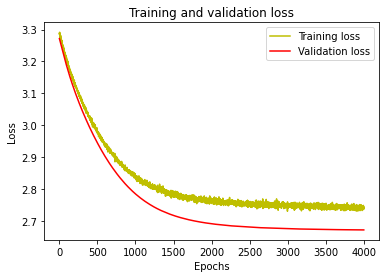

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

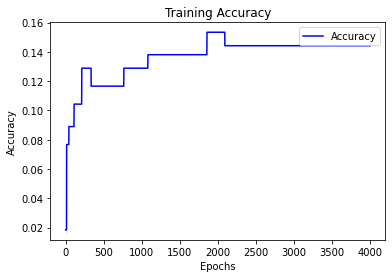

In [30]:
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [3]:
input_date = datetime.strptime('04/06/2021', '%m/%d/%Y')
input_week = int(input_date.strftime("%W"))
input_day_name = input_date.strftime("%A")
input_week_cos = np.cos(2 * np.pi * input_week / 7)
input_week_sin = np.sin(2 * np.pi * input_week / 7)

input_data = []
input_data.append(input_week_cos)
input_data.append(input_week_sin)
input_data.append(input_day_name)

unseen = pd.DataFrame([input_data], columns = ['week_cos', 'week_sin', 'Day_Name'])

In [40]:
day_str = unseen['Day_Name']
day_str

0    Tuesday
Name: Day_Name, dtype: object

In [41]:
input_df = pd.DataFrame(ohe.transform(labelencoder.transform(day_str.ravel()).reshape(-1,1)).toarray().astype(int))
unseen = unseen.join(input_df)

In [42]:
unseen = unseen.drop('Day_Name', axis = 1)

In [43]:
unseen_X = scaler.transform(unseen[unseen.columns[:]])

In [44]:
unseen

,week_cos,week_sin,0,1,2,3
0,1.0,-4.898587e-16,0,0,1,0


In [45]:
unseen_X

array([[1. , 0.5, 0. , 0. , 1. , 0. ]])

In [49]:
pred = np.argmax(model.predict(unseen_X), axis=None)

In [50]:
pred

0

In [77]:
argss = np.argmax(model.predict(X_test[8:9]), axis = None)

In [71]:
y_test[5:6]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [91]:
encoder.inverse_transform([argss])

array([2], dtype=int64)

In [87]:
argss

1

In [89]:
encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 26, 27, 28], dtype=int64)